# Sleep Quality Analysis

In [425]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [426]:
df = pd.read_csv("SleepStudyData.csv")
df.insert(0, "Tired", df.pop("Tired"))
df = df.dropna()

#### Explanation of the variables in the dataset (from the publisher):
<pre>
Enough = Do you think that you get enough sleep?
Hours = On average, how many hours of sleep do you get on a weeknight?
PhoneReach = Do you sleep with your phone within arms reach?
PhoneTime = Do you use your phone within 30 minutes of falling asleep?
Tired = On a scale from 1 to 5, how tired are you throughout the day? (1 being not tired, 5 being very tired)
Breakfast = Do you typically eat breakfast?</pre>
Data can be found [here](https://www.kaggle.com/datasets/mlomuscio/sleepstudypilot?select=SleepStudyData.csv)


## Interactive Tiredness Bargraph

In [407]:
import plotly.express as px
from jupyter_dash import JupyterDash
from dash import Input, Output, html, dcc
import dash_bootstrap_components as dbc

JupyterDash.infer_jupyter_proxy_config()

app = JupyterDash(__name__, external_stylesheets=[dbc.themes.LUX])
mytitle = dcc.Markdown(children='')
barplot = dcc.Graph(figure={})
dropdown = dcc.Dropdown(options=df.drop("Tired", axis=1).columns.values, 
                        value='Enough',
                        clearable =False)

app.layout = dbc.Container([
    html.H4("Tiredness Graph"),
    barplot,
    dropdown,
])

@app.callback(
    Output(barplot, 'figure'),
    Input(dropdown, 'value')
)
def update_graph(column_name):
    fig = px.bar(df, x=column_name, y="Tired", barmode="group")
    return fig

app.run_server(mode='inline') 


## Hours Slept vs Tiredness

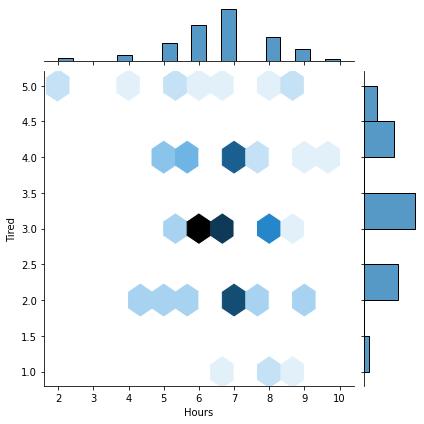

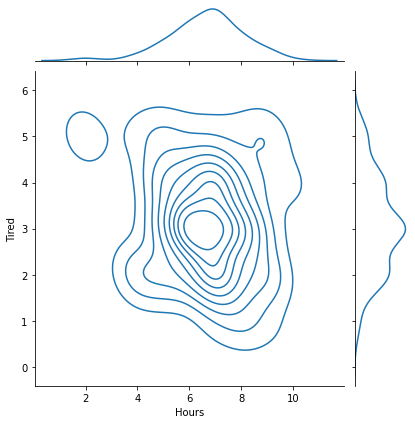

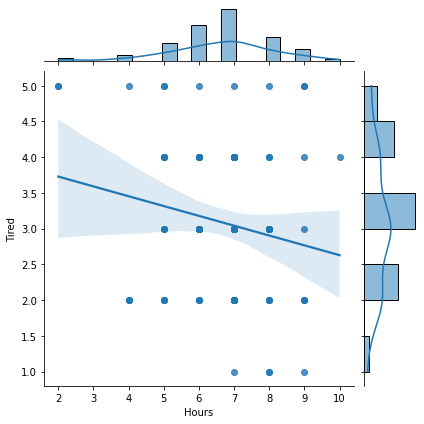

In [408]:
import seaborn as sns

sns.jointplot(x="Hours", y="Tired", data=df, kind="hex")
sns.jointplot(x="Hours", y="Tired", data=df, kind="kde")
sns.jointplot(x="Hours", y="Tired", data=df, kind="reg")

## Enough Sleep vs Tiredness

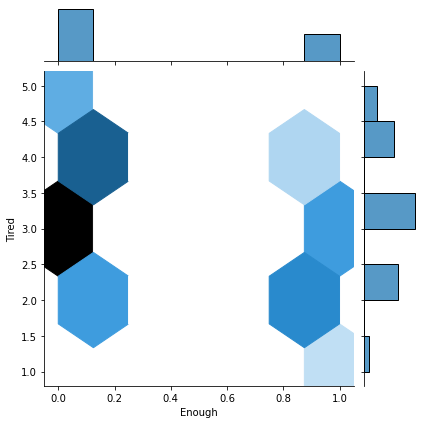

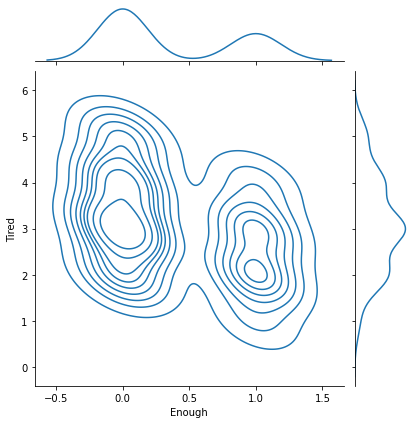

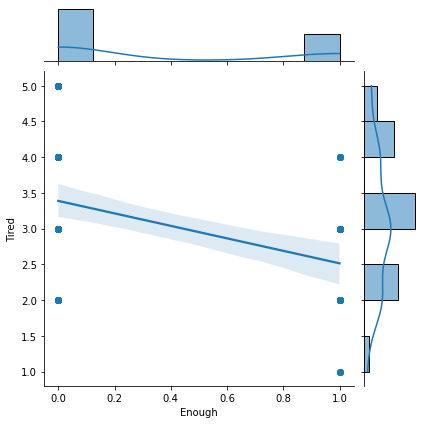

In [427]:
df["Enough"] = df["Enough"].map({"Yes":1, "No":0})
df["PhoneReach"] = df["PhoneReach"].map({"Yes":1, "No":0})
df["PhoneTime"] = df["PhoneTime"].map({"Yes":1, "No":0})
df["Breakfast"] = df["Breakfast"].map({"Yes":1, "No":0})

sns.jointplot(x="Enough", y="Tired", data=df, kind="hex")
sns.jointplot(x="Enough", y="Tired", data=df, kind="kde")
sns.jointplot(x="Enough", y="Tired", data=df, kind="reg")

## Phone Reach vs Tiredness

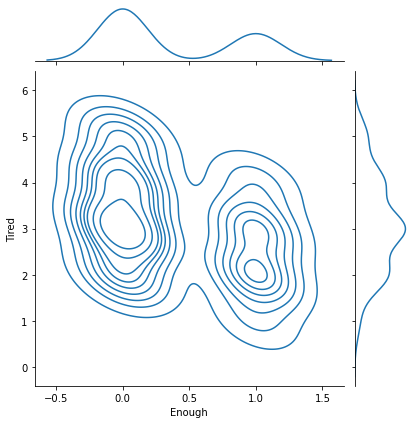

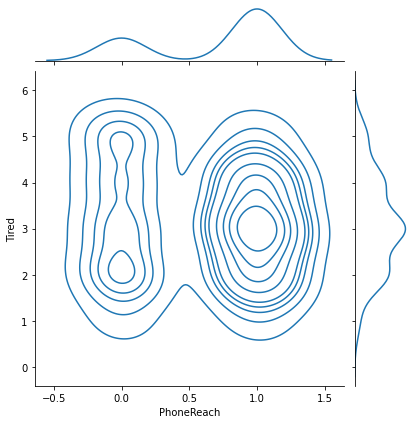

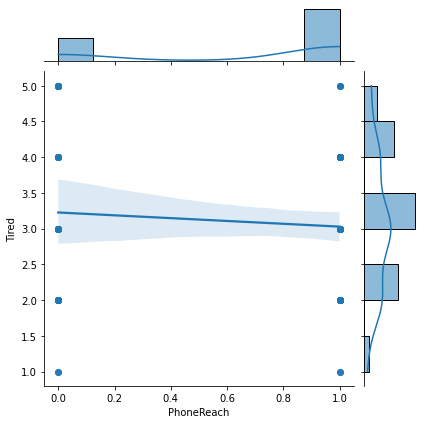

In [419]:
sns.jointplot(x="PhoneReach", y="Tired", data=df, kind="hex")
sns.jointplot(x="PhoneReach", y="Tired", data=df, kind="kde")
sns.jointplot(x="PhoneReach", y="Tired", data=df, kind="reg")

## Phone Time vs Tiredness

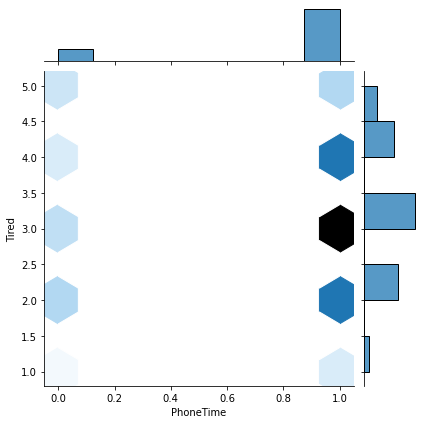

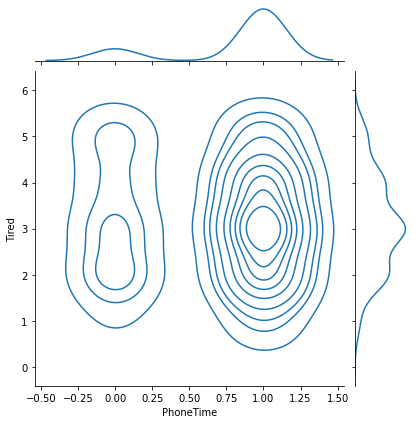

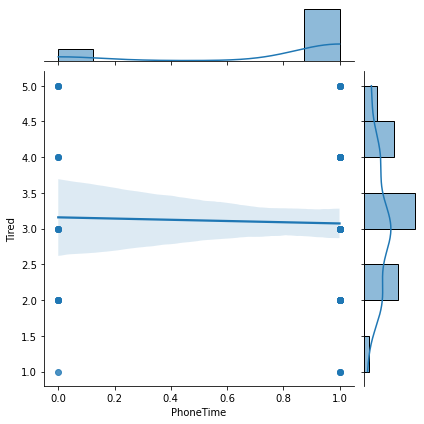

In [433]:
sns.jointplot(x="PhoneTime", y="Tired", data=df, kind="hex")
sns.jointplot(x="PhoneTime", y="Tired", data=df, kind="kde")
sns.jointplot(x="PhoneTime", y="Tired", data=df, kind="reg")

## Breakfast vs Tiredness

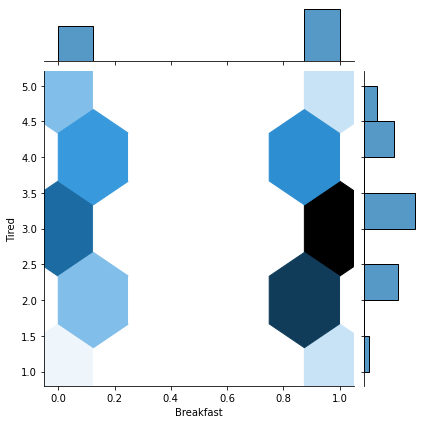

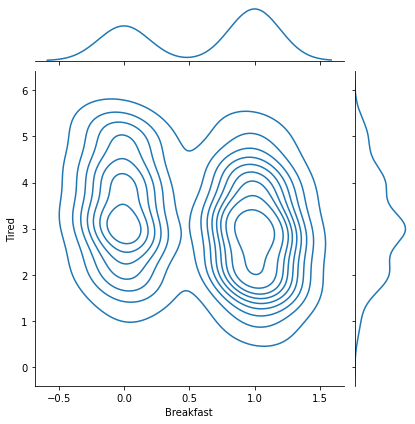

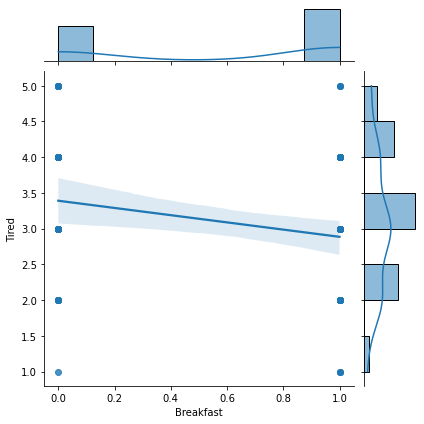

In [434]:
sns.jointplot(x="Breakfast", y="Tired", data=df, kind="hex")
sns.jointplot(x="Breakfast", y="Tired", data=df, kind="kde")
sns.jointplot(x="Breakfast", y="Tired", data=df, kind="reg")

## Machine Learning Analysis

In [451]:
df = pd.read_csv("SleepStudyData.csv")
df.insert(0, "Tired", df.pop("Tired"))
df = df.dropna()
len(df)

102

In [445]:
df["Enough"] = df["Enough"].map({"Yes":1, "No":0})
df["PhoneReach"] = df["PhoneReach"].map({"Yes":1, "No":0})
df["PhoneTime"] = df["PhoneTime"].map({"Yes":1, "No":0})
df["Breakfast"] = df["Breakfast"].map({"Yes":1, "No":0})

df["Tired"] = df["Tired"].map({1:0, 2:0, 3:0, 4:1, 5:1})

In [446]:
from sklearn.model_selection import train_test_split

X = df.drop("Tired", axis = 1)

#X = df["Hours"].array.reshape(-1, 1)
y = df["Tired"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [447]:
from sklearn.linear_model import LogisticRegression
import numpy as np

np.random.seed(52)

model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)

LogisticRegression()

## Model Score, Coefficients, and Interpretation

In [448]:
model.score(X_test,y_test)

0.8571428571428571

The model performs well, correctly predicting 85.7% of the test data, which is clearly better than chance. 

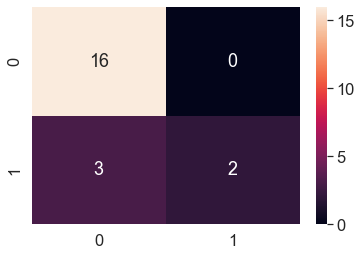

In [465]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.show()

In [450]:
pd.DataFrame(zip(X_train.columns, np.transpose(model.coef_)), columns=['Features', 'Coefficients'])

,Features,Coefficients
0,Enough,[-0.8788679149185512]
1,Hours,[-0.003531906987619947]
2,PhoneReach,[-0.7333563809270994]
3,PhoneTime,[-0.04264265585190071]
4,Breakfast,[-0.7000255347992407]


Optimal insight based upon this dataset and logistic regression model would include recommendations to sleep with one's phone in reach, use one's phone before bed, and eat breakfast. It also indicates that the best predictor for sleep quality (tiredness), is whether or not one believes they got enough sleep. This ties in with the near zero coefficient for 'Hours' slept, which as one could interpret it, means that the number of hours slept isn't nearly as important as simply "getting enough sleep" according to one's own standard. 